- Recortamos la imagen de acuerdo a dónde no hay texto

# todo:
- insertamos el registro del libro usando parse e incluyendo la imagen

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from PIL import Image
from ipywidgets import fixed, interactive
from ut.images import crop
from utils import get_books, get_image_path, upload_lib_summary, get_book_datas
from ut.io import get_filename
from ut.base import json_read

PATH_CALIBRE = 'c:/Users/milen/Biblioteca de calibre/'

#### a) los de la última fecha

In [3]:
doc_list, files = get_books(PATH_CALIBRE)

** La ultima fecha de ficheros es:  20221114
                                                   0
0  Enders Game 2 - Speaker for the - Card, Orson ...


In [4]:
images = [get_image_path(x) for x in files]

In [5]:
i = 0
titulo = get_filename(files[i], True).split(' - ')[0]
print(titulo) #ojo que puede estar cortado por Calire si es muy largo... quizas deberíamos cogerlo de la carpeta..
im = Image.open(images[i])

Enders Game 2


In [6]:
files[0]

'c:/Users/milen/Biblioteca de calibre\\Card, Orson Scott\\Enders Game 2 - Speaker for the Dea (219)\\Enders Game 2 - Speaker for the - Card, Orson Scott.txt'

#### b) Por nombre

In [5]:
txt, im, titulo, d = get_book_datas('reak')

Super Freakonomics


#### Continuamos

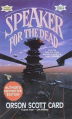

In [7]:
if im.size[0] > 700:
    im = im.reduce(2)
im.reduce(4)

In [8]:
im.size

(285, 475)

In [9]:
u = interactive(crop, f=(0.1, 1, 0.05),
                sx=(1, int(im.size[0] * .5)),
                sy=(1, int(im.size[1] * .9)),
                img=fixed(im))
u

interactive(children=(FloatSlider(value=0.55, description='f', max=1.0, min=0.1, step=0.05), IntSlider(value=7…

In [10]:
si = u.result.size[0]
a = 200
b = min(si, 2 * a)
im_low = u.result.resize((a, a))
im_hi = u.result.resize((b, b))

# im_low
# la insertaremos mano luego
# https://parse-dashboard.back4app.com/apps/a8b7aa27-c240-42d5-9567-d95a43ba4b8f/browser/librosSum

In [11]:
base = 'data_out/_images/{}/{}.jpg'
im_low.save(base.format('low', titulo))
im_hi.save(base.format('hi', titulo))

# Crear el objeto

https://dashboard.back4app.com/apidocs#creating-objects
https://parse-dashboard.back4app.com/apps/a8b7aa27-c240-42d5-9567-d95a43ba4b8f/browser/librosSum

In [ ]:
# vamos a crear el objeto summary para insertarlo en librossum con imagen

In [65]:
# revisar esto
j = json_read('data/summary_ex.json')
j

{'El planeta americano': {'author': 'Vicente Verdu',
  'title': 'El planeta americano',
  'fakeAuthoro': 'Chicago Mcdonald’s',
  'fakeTitle': 'Nación 000 Norteamericanos',
  'path': 'c:/Users/milen/Biblioteca de calibre\\Vicente Verdu\\El planeta americano (89)\\El planeta americano - Vicente Verdu.txt',
  'listo': False,
  'i': 1,
  'nCapitulos': 348,
  'min': 13,
  'max': 386,
  'idioma': 'ES',
  'libroId': 999}}

In [85]:
upload_lib_summary(j)

{'results': [{'objectId': '2QZU4HQQC1',
   'libroId': 124,
   'nCapitulos': 305,
   'title': 'Mortal y rosa',
   'author': 'Francisco Umbral',
   'fakeTitle': 'Mecedora Antropoide Escritor',
   'fakeAuthor': 'Breton Pueriles',
   'idioma': 'ES',
   'createdAt': '2019-03-30T08:31:07.038Z',
   'updatedAt': '2019-03-30T08:35:06.527Z',
   'image': {'__type': 'File',
    'name': '4c0ab2d773cb1336b4695e114b71fd69_124_Mortal_y_rosa.jpg',
    'url': 'https://parsefiles.back4app.com/osZTTBy5RTLsYv1I9Fgma8LfYnU2vn307cg82jDu/4c0ab2d773cb1336b4695e114b71fd69_124_Mortal_y_rosa.jpg'}},
  {'objectId': '6pM4FP5DdD',
   'nCapitulos': 1079,
   'title': 'Recuerdos',
   'author': 'McMaster Bujold, Lois',
   'fakeTitle': 'Barrayar Lord Almirante',
   'fakeAuthor': 'Gregor Laisa',
   'createdAt': '2017-06-05T13:31:32.781Z',
   'updatedAt': '2017-06-09T18:02:07.423Z',
   'image': {'__type': 'File',
    'name': '9eb453955effa964283de3734ba6ccb9_Recuerdos.jpg',
    'url': 'https://parsefiles.back4app.com/osZTT